In [1]:
%reload_ext autoreload
%autoreload 2
%reload_ext notexbook
%texify

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread
import pathlib
from pathlib import Path
sns.set_style('white')


In [3]:
GAIN_IMG_PATH = Path('/mnt/sda1/SMLAT/data/real_data/dark_images/camera_calibration_pool/Gain.tiff')
RN_PATH = Path('/mnt/sda1/SMLAT/data/real_data/chromosome_dots/pooled_8865/RN_e_venus.tiff')

In [4]:
gain_img = imread(GAIN_IMG_PATH)
h, w = gain_img.shape
gain_img = gain_img[h//2:, :]

In [5]:
gain_img.shape

(1041, 1302)

In [6]:
gain_distribution = gain_img.ravel()
gain_distribution = gain_distribution[~np.isnan(gain_distribution)]

#### Plot Gain

In [7]:
SAVE_DIR = Path('/mnt/sda1/SMLAT/figures/supplementary/camera/')

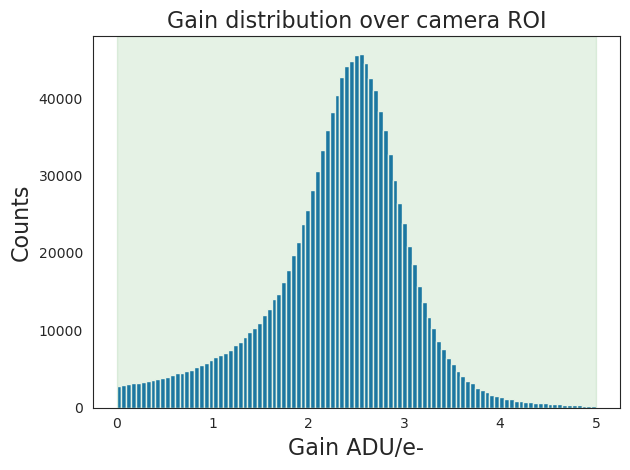

In [9]:
save_fig = SAVE_DIR / Path('Gain_distribution.svg')

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.hist(gain_distribution, bins=np.linspace(0.0, 5.0, 100))
ax.axvspan(0.0, 5.0, color='green', alpha=0.1)
ax.set_xlabel('Gain ADU/e-', fontsize=16)
ax.set_ylabel('Counts', fontsize=16)
ax.set_title('Gain distribution over camera ROI', fontsize=16)
plt.tight_layout()
plt.show()

fig.savefig(save_fig, bbox_inches='tight', pad_inches=0, transparent=True, dpi=300)
plt.close(fig)

### Read noise + thermal noise 

In [11]:
RN_e = imread(RN_PATH)

In [12]:
RN_e_distribution = RN_e.ravel()


#### Combined RN+TN at 150ms expsoure

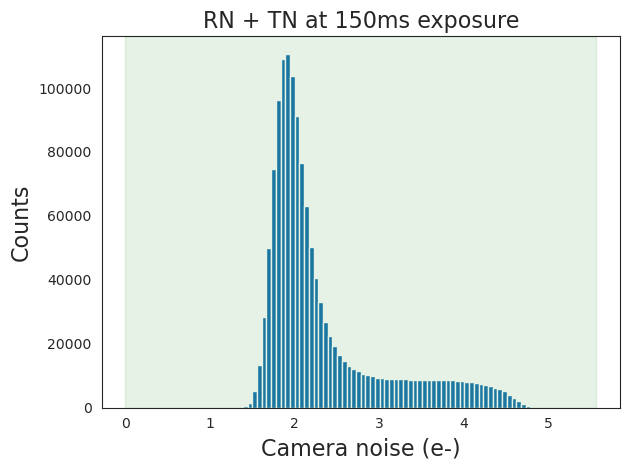

In [13]:
save_fig = SAVE_DIR / Path('camera_noise.svg')

fig, ax = plt.subplots(nrows=1, ncols=1)

ax.hist(RN_e_distribution, bins=100)
ax.axvspan(RN_e_distribution.min(), RN_e_distribution.max(), color='green', alpha=0.1)

ax.set_xlabel("Camera noise (e-)", fontsize=16)
ax.set_ylabel("Counts", fontsize=16)
ax.set_title("RN + TN at 150ms exposure", fontsize=16)
plt.tight_layout()
plt.show()


fig.savefig(save_fig, bbox_inches='tight', pad_inches=0, transparent=True, dpi=300)
plt.close(fig)


#### Plot a sub area of the camera ROI

In [14]:

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

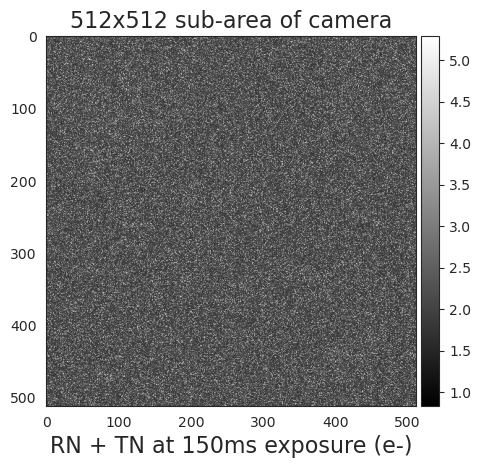

In [17]:
save_fig = SAVE_DIR / Path('camera_noise_sub_area.svg')

fig, ax = plt.subplots(nrows=1, ncols=1)
im = ax.imshow(RN_e[:512, :512], cmap='gray')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
ax.set_title("512x512 sub-area of camera", fontsize=16)
ax.set_xlabel("RN + TN at 150ms exposure (e-)", fontsize=16)
plt.show()


fig.savefig(save_fig, bbox_inches='tight', pad_inches=0, transparent=True, dpi=300)
plt.close(fig)
